In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [2]:
data=pd.read_csv("heart_disease.csv")

In [3]:
data.head(10)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,7,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
7,8,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,9,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
9,10,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [4]:
data.shape

(303, 15)

In [5]:
data.dtypes

Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca             object
thal           object
present         int64
dtype: object

In [6]:
# we have two object dtypes

In [7]:
data.ca

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302      ?
Name: ca, Length: 303, dtype: object

In [8]:
data["ca"]=data.ca.str.replace("?","")

In [9]:
data.ca

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302       
Name: ca, Length: 303, dtype: object

In [10]:
data["ca"]=pd.to_numeric(data["ca"],errors="coerce")

In [11]:
data.ca

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302    NaN
Name: ca, Length: 303, dtype: float64

In [12]:
data["thal"]=data.thal.str.replace("?","")

In [13]:
data["thal"]=pd.to_numeric(data.thal,errors="coerce")


In [14]:
data.dtypes

Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca            float64
thal          float64
present         int64
dtype: object

In [15]:
data.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            4
thal          2
present       0
dtype: int64

In [16]:
data.ca.value_counts

<bound method IndexOpsMixin.value_counts of 0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302    NaN
Name: ca, Length: 303, dtype: float64>

In [17]:
# data=data.drop(columns=["Unnamed: 0"], inplace=True)
df=data[["ca","thal"]]
df

,ca,thal
0,0.0,6.0
1,3.0,3.0
2,2.0,7.0
3,0.0,3.0
4,0.0,3.0
...,...,...
298,0.0,7.0
299,2.0,7.0
300,1.0,7.0
301,1.0,3.0


In [18]:
imputer=KNNImputer(n_neighbors=2)
data_imputed=imputer.fit_transform(df)
data_imputed=pd.DataFrame(data_imputed,columns=df.columns)
df=data_imputed
df.isna().sum()
                          

ca      0
thal    0
dtype: int64

In [19]:
data.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [20]:
data=data.drop(columns=["Unnamed: 0"], axis=1)

In [21]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [22]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
present       int64
dtype: object

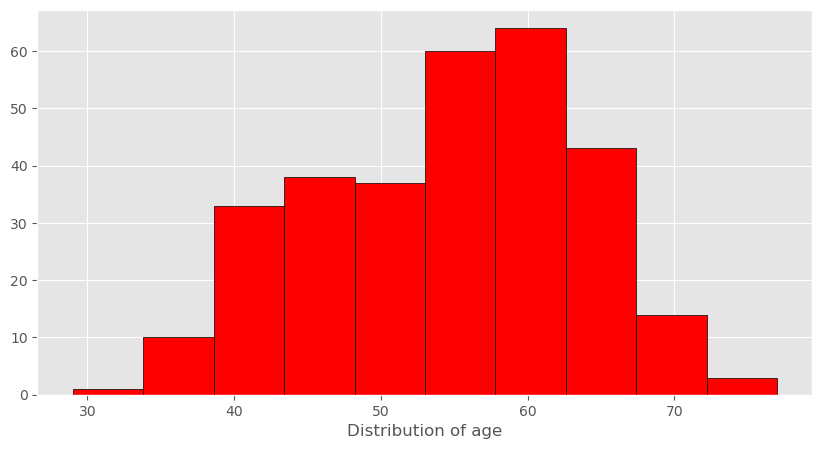

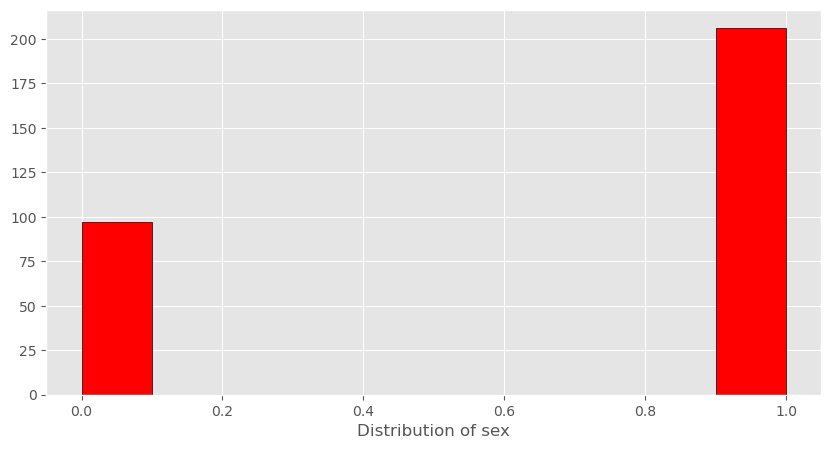

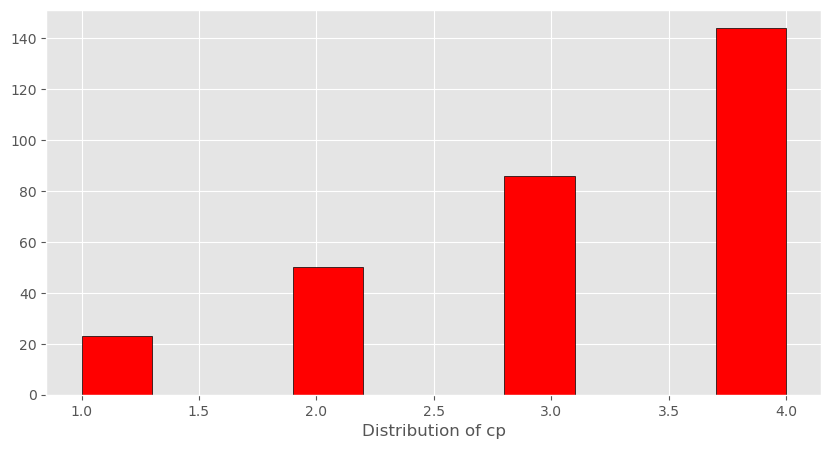

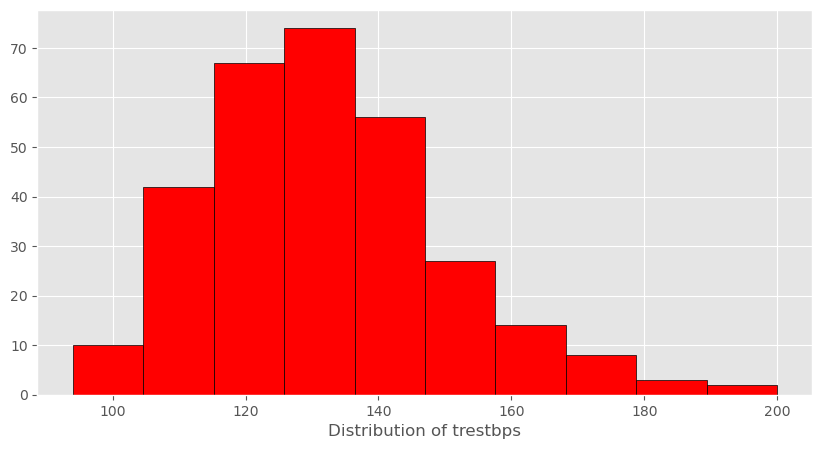

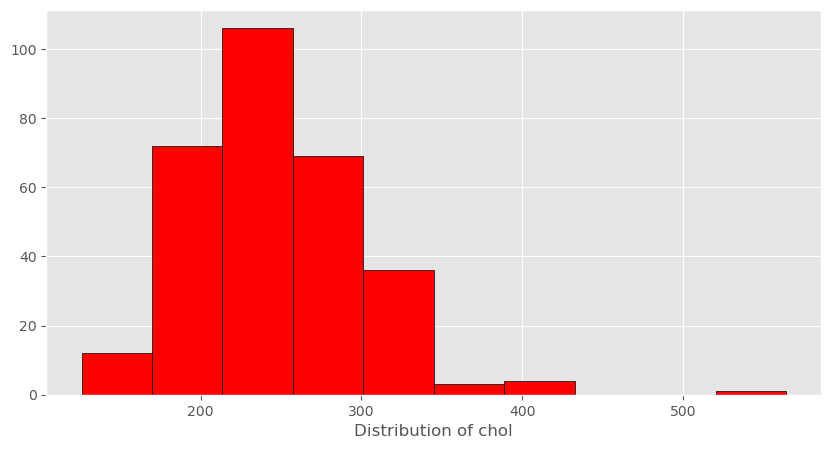

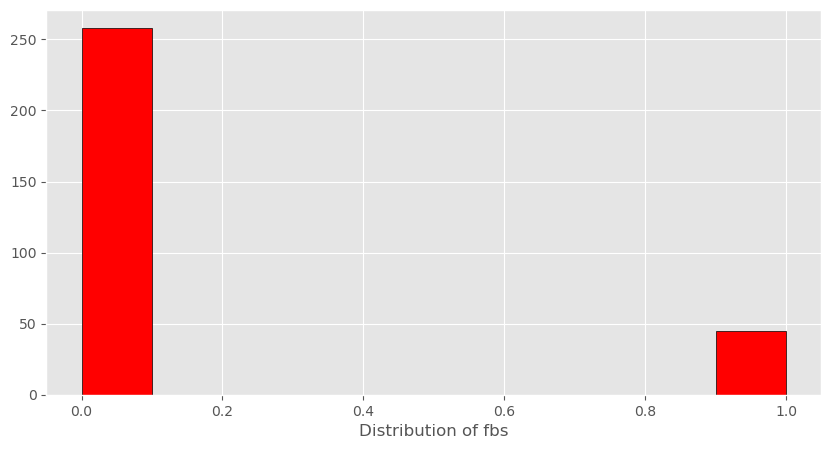

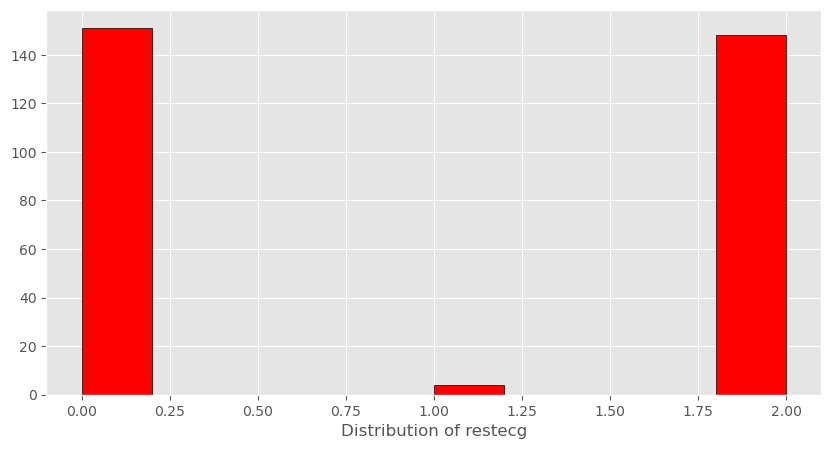

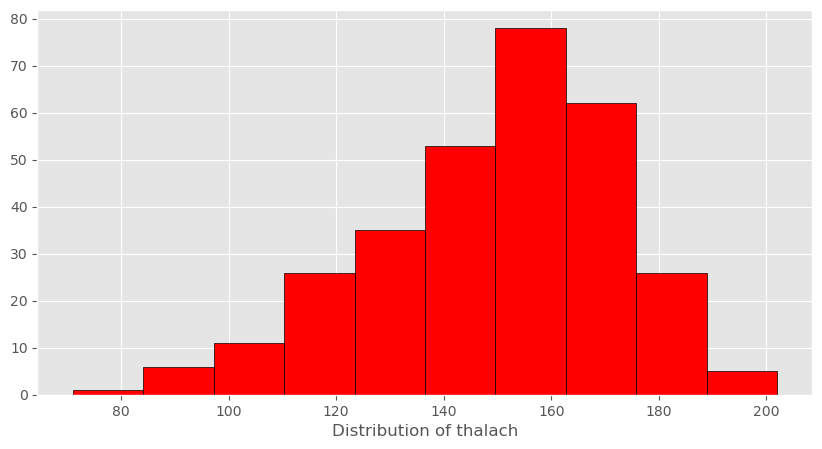

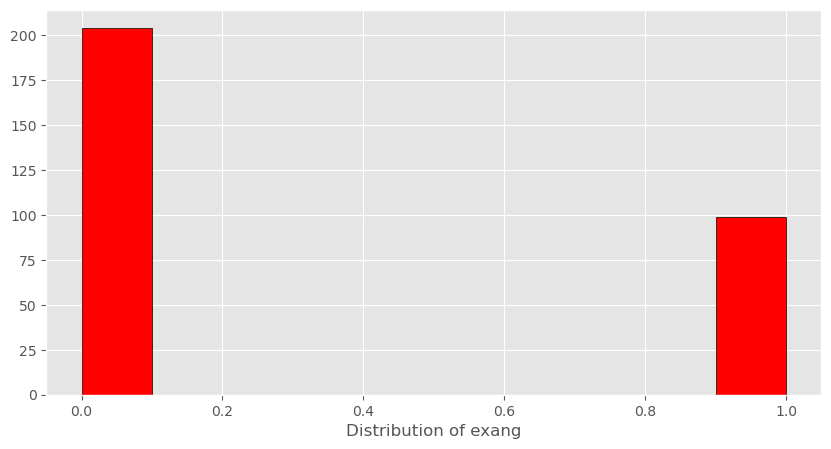

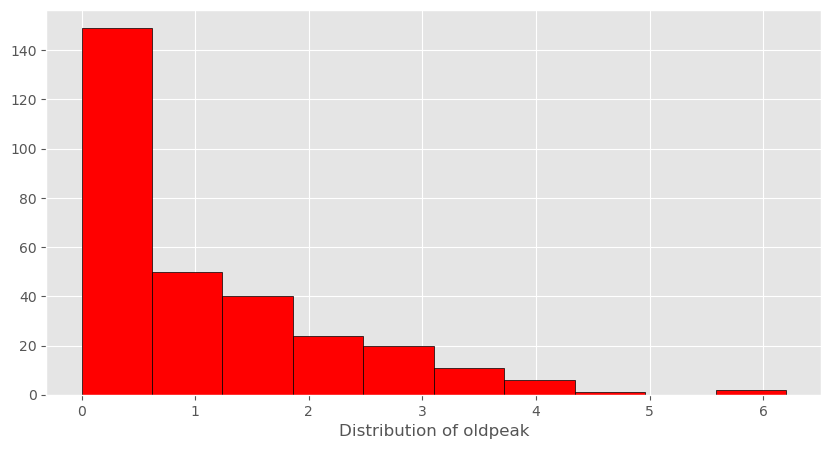

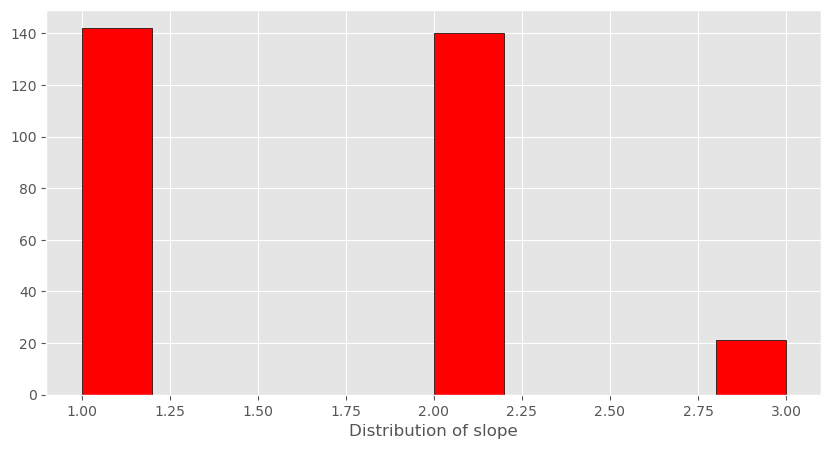

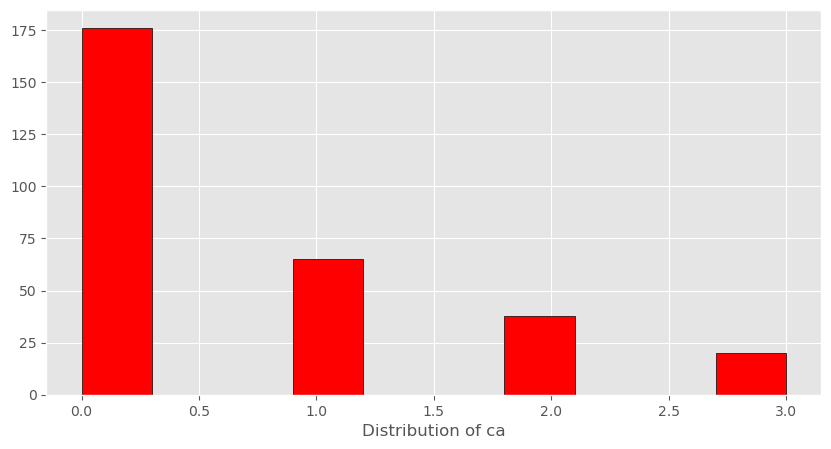

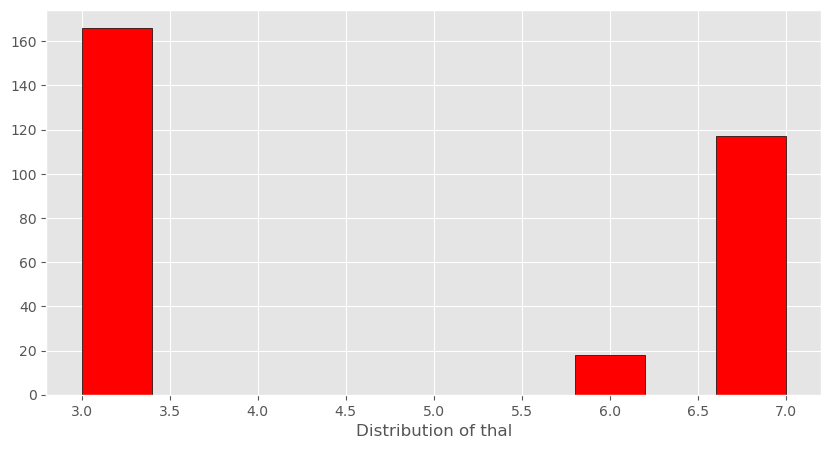

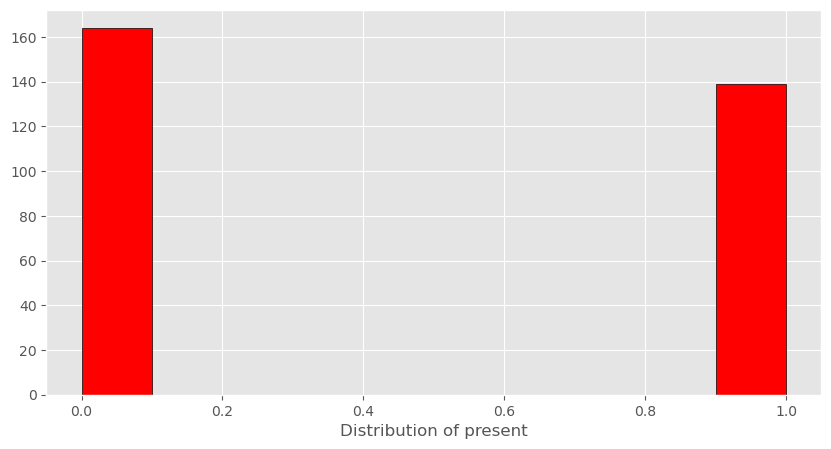

In [23]:
for columns in data:
    plt.style.use("ggplot")
    plt.figure(figsize=(10,5))
    plt.hist(x=columns,data=data,color="red",edgecolor="black")
    plt.xlabel(f"Distribution of {columns}")
plt.show()

In [24]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [29]:
data.age.value_counts

<bound method IndexOpsMixin.value_counts of 0      63
1      67
2      67
3      37
4      41
       ..
298    45
299    68
300    57
301    57
302    38
Name: age, Length: 303, dtype: int64>

In [26]:
data.max()

age          77.0
sex           1.0
cp            4.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         3.0
ca            3.0
thal          7.0
present       1.0
dtype: float64

In [27]:
correlation=data.corr()

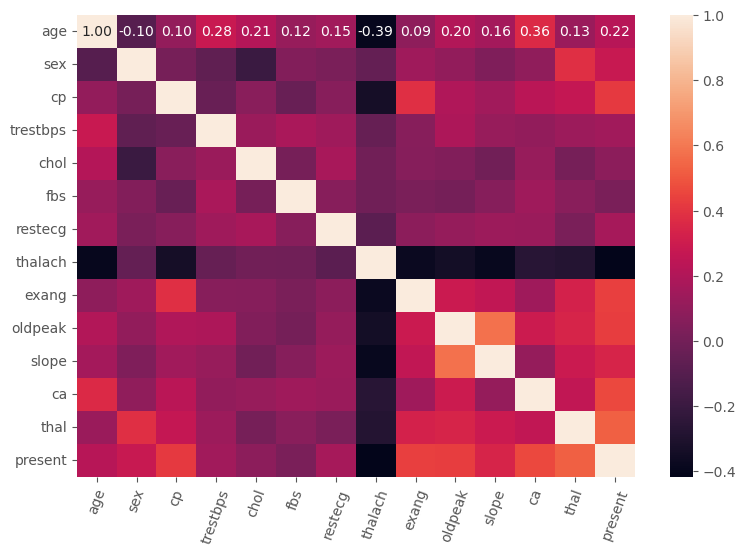

In [31]:
plt.figure(figsize=(9,6))
sns.heatmap(correlation,annot=True,fmt=".02f")
plt.xticks(rotation=70)
plt.show()

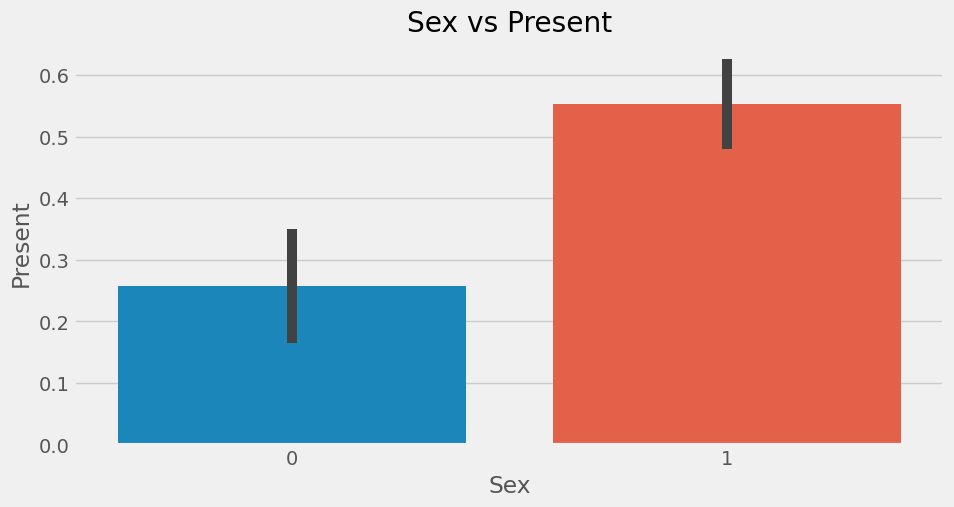

In [35]:
plt.figure(figsize=(10, 5))
plt.style.use("fivethirtyeight")

sns.barplot(x='sex', y='present', data=data)
plt.xlabel('Sex')
plt.ylabel('Present')
plt.title('Sex vs Present')
plt.show()

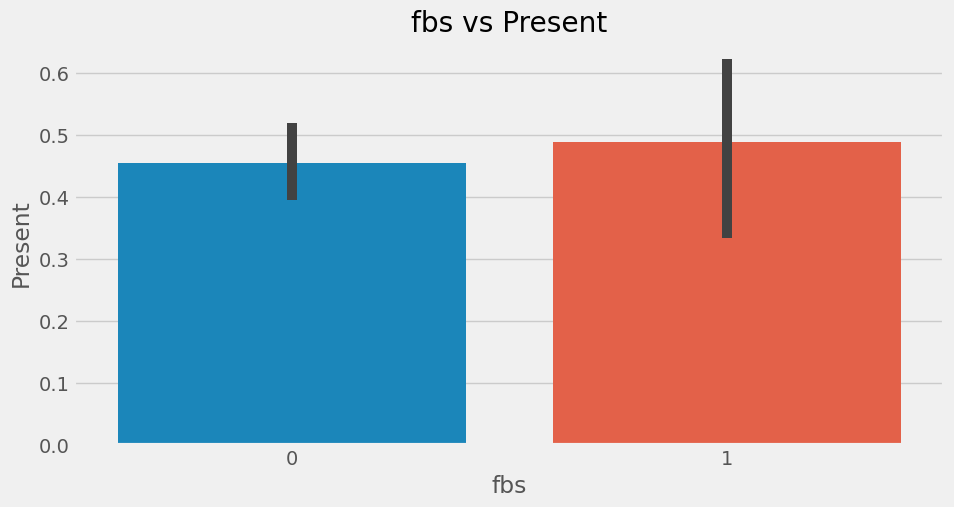

In [37]:
plt.figure(figsize=(10, 5))
plt.style.use("fivethirtyeight")

sns.barplot(x='fbs', y='present', data=data)
plt.xlabel('fbs')
plt.ylabel('Present')
plt.title('fbs vs Present')
plt.show()

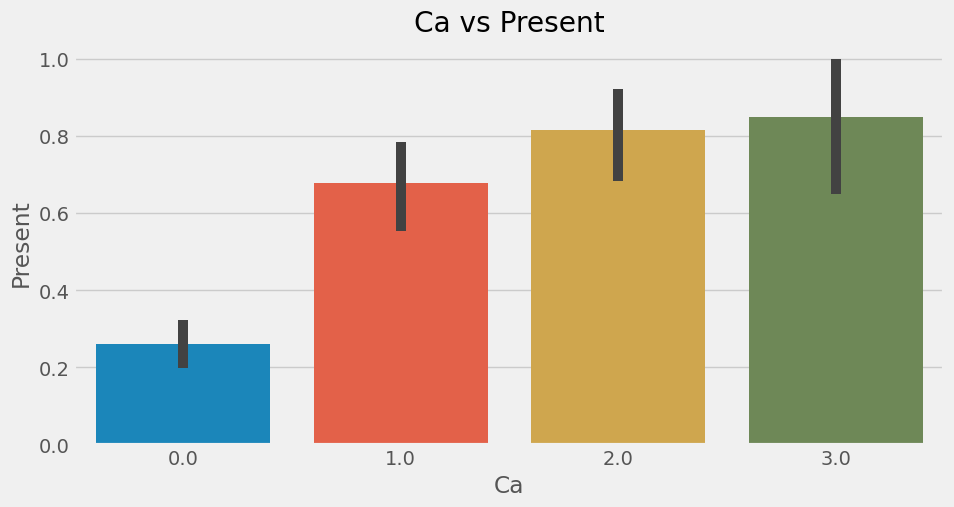

In [38]:
plt.figure(figsize=(10, 5))
plt.style.use("fivethirtyeight")

sns.barplot(x='ca', y='present', data=data)
plt.xlabel('Ca')
plt.ylabel('Present')
plt.title('Ca vs Present')
plt.show()